In [1]:
import os
import cv2
import numpy as np
from imutils import paths
import pickle

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


In [3]:
from keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from keras.applications import ResNet50
from keras.models import Model
from keras.optimizers.legacy import SGD

In [4]:
dataPath = r"/Users/priyankafrancis/Desktop/Dissertation/data"
outputmodel = r"/Users/priyankafrancis/Desktop/Dissertation/Video_Classification_model/videoclassification"
outpulabebinarize = r"/Users/priyankafrancis/Desktop/Dissertation/Video_Classification_model/video50"
epoch = 25

In [5]:
video_Labels = set(['snow','sunny','raining','football','badminton','baseball','basketball','boxing','chess','cricket','fencing','football','formula1','gymnastics','hockey','ice_hockey','kabaddi','motogp','shooting','swimming','table_tennis','tennis','volleyball','weight_lifting','wrestling','wwe'])
print ("Images are being loaded ....")
pathToImages = list(paths.list_images(dataPath)) 
data = []
labels = []

# PreProcessing of Data
for images in pathToImages:
    label = images.split(os.path.sep)[-2]
    if label not in video_Labels:
        continue
    image = cv2.imread(images)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (244, 224))  # Change resize dimensions here
    data.append(image)
    labels.append(label)
    


Images are being loaded ....


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 'GRAY':

In [6]:
# Coverting data and labels to numpy arrays for model training
data = np.array(data)
labels = np.array(labels)

# Hot Encoded Values as 0,1,2,3,4,5,6
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
# train test data split
(X_train, X_test, Y_train, Y_test) = train_test_split(data,labels,test_size=0.25,stratify=labels,random_state=42)

In [8]:
# Augmentation
trainingAugmentation = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation Augmentation
validationAugmentation = ImageDataGenerator()

mean = np.array([123.68, 116.779, 103,939] , dtype="float32")
trainingAugmentation.mean = mean
validationAugmentation.mean = mean


In [9]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224,244,3)))

headModel = baseModel.output
haedModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512,activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)
model = Model(inputs=baseModel.input , outputs=headModel)

for baseModelLayers in baseModel.layers:
    baseModelLayers.trainable = False

In [10]:
opt = SGD(lr=0.0001, momentum=0.9, decay=1e-4/epoch)

/Users/priyankafrancis/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
import math

batch_size = 32
steps_per_epoch = math.ceil(len(X_train) / batch_size)

In [13]:
History = model.fit_generator(
    trainingAugmentation.flow(X_train,Y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    validation_data=validationAugmentation.flow(X_test,Y_test),
    validation_steps=len(X_test) // 32,
    epochs=epoch
)

/var/folders/br/m_cg9hx50713f33ph31t6xxc0000gn/T/ipykernel_83610/3917943912.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(


Epoch 1/25
339/339 [==============================] - 496s 1s/step - loss: 2.4718 - accuracy: 0.3407 - val_loss: 1.1834 - val_accuracy: 0.6665
Epoch 2/25
339/339 [==============================] - 1074s 3s/step - loss: 1.6095 - accuracy: 0.5412 - val_loss: 0.9201 - val_accuracy: 0.7243
Epoch 3/25
339/339 [==============================] - 524s 2s/step - loss: 1.3810 - accuracy: 0.5956 - val_loss: 0.8066 - val_accuracy: 0.7622
Epoch 4/25
339/339 [==============================] - 490s 1s/step - loss: 1.2266 - accuracy: 0.6379 - val_loss: 0.7364 - val_accuracy: 0.7763
Epoch 5/25
339/339 [==============================] - 496s 1s/step - loss: 1.1486 - accuracy: 0.6564 - val_loss: 0.7066 - val_accuracy: 0.7909
Epoch 6/25
339/339 [==============================] - 3219s 10s/step - loss: 1.0600 - accuracy: 0.6801 - val_loss: 0.6735 - val_accuracy: 0.7962
Epoch 7/25
339/339 [==============================] - 488s 1s/step - loss: 0.9954 - accuracy: 0.6981 - val_loss: 0.6489 - val_accuracy: 0.8

In [14]:
import pickle

In [15]:
model.save(outputmodel)
lbinarizer=open(r"/Users/priyankafrancis/Desktop/Dissertation/output/video50.pickle","wb")
lbinarizer.write(pickle.dumps(lb))
lbinarizer.close()

INFO:tensorflow:Assets written to: /Users/priyankafrancis/Desktop/Dissertation/Video_Classification_model/videoclassification/assets


INFO:tensorflow:Assets written to: /Users/priyankafrancis/Desktop/Dissertation/Video_Classification_model/videoclassification/assets


In [16]:
# After training
print("Training accuracy:", History.history['accuracy'][-1])
print("Validation accuracy:", History.history['val_accuracy'][-1])

Training accuracy: 0.82133948802948
Validation accuracy: 0.8490044474601746


In [17]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test_classes, Y_pred_classes)
recall = recall_score(Y_test_classes, Y_pred_classes, average='weighted')
f1 = f1_score(Y_test_classes, Y_pred_classes, average='weighted')
precision = precision_score(Y_test_classes, Y_pred_classes, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

114/114 [==============================] - 117s 1s/step
Accuracy: 0.8491712707182321
Recall: 0.8491712707182321
F1 Score: 0.8491490039422841
Precision: 0.851602873658884


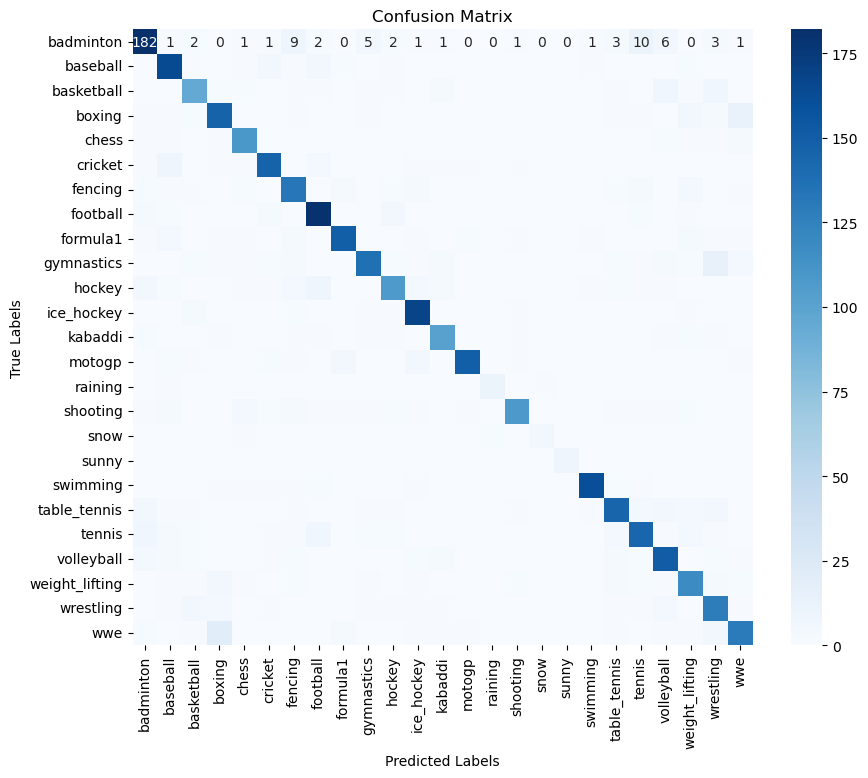

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test_classes, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


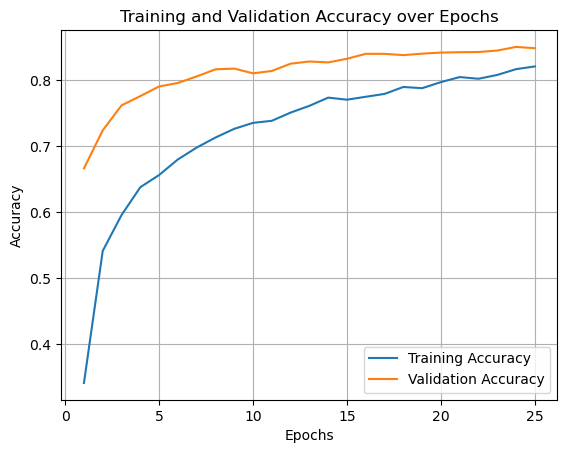

In [19]:
# Extract accuracy values
training_accuracy = History.history['accuracy']
validation_accuracy = History.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# Create a line plot
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()